+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|               100|
|   mean|             39.66|
| stddev|12.032128706597232|
|    min|                18|
|    max|                59|
+-------+------------------+

Outliers in Age:
+-------+----+---+------+------+-------+--------+
|User_ID|Name|Age|Gender|Income|Contact|Location|
+-------+----+---+------+------+-------+--------+
+-------+----+---+------+------+-------+--------+



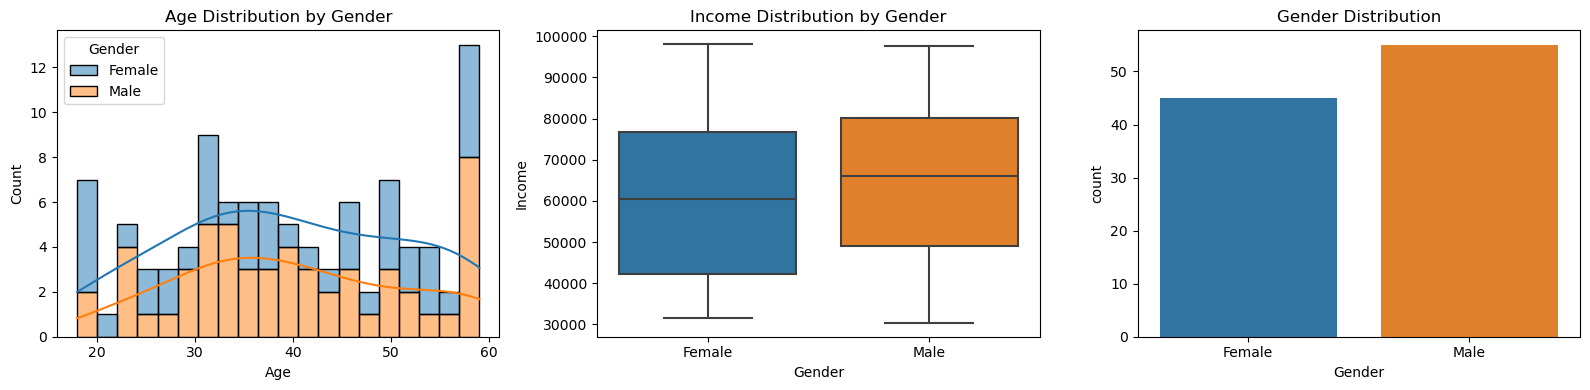

UnboundLocalError: local variable 'product_data' referenced before assignment

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.sql.functions as F
from pyspark.sql import SparkSession

# Load generated data
user_profiles_pd = pd.read_csv('/home/raja/Documents/MS-DATA-SCIENCE/Fall-2023/Big-Data-Project/UserProfiles_data.csv')
product_data_pd = pd.read_csv('/home/raja/Documents/MS-DATA-SCIENCE/Fall-2023/Big-Data-Project/ProductData_data.csv')
user_interactions_pd = pd.read_csv('/home/raja/Documents/MS-DATA-SCIENCE/Fall-2023/Big-Data-Project/UserInteractions_data.csv')

# Convert pandas DataFrames to PySpark DataFrames
spark = SparkSession.builder.getOrCreate()
user_profiles = spark.createDataFrame(user_profiles_pd)
product_data = spark.createDataFrame(product_data_pd)
user_interactions = spark.createDataFrame(user_interactions_pd)

# User Profiles Report
def user_profiles_report():
    global user_profiles  # Declare user_profiles as a global variable

    # Handle null values for numerical attribute 'Age'
    user_profiles = user_profiles.na.fill({'Age': user_profiles.select(F.mean('Age')).collect()[0][0]})

    # Profile numerical attribute 'Age'
    user_profiles.select('Age').describe().show()

    # Explain outliers for numerical attribute 'Age'
    outliers = user_profiles.filter(F.col('Age') > 100)
    print("Outliers in Age:")
    outliers.show()

    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(data=user_profiles.toPandas(), x='Age', hue='Gender', bins=20, multiple='stack', kde=True)
    plt.title('Age Distribution by Gender')

    plt.subplot(1, 3, 2)
    sns.boxplot(x='Gender', y='Income', data=user_profiles.toPandas())
    plt.title('Income Distribution by Gender')

    plt.subplot(1, 3, 3)
    sns.countplot(x='Gender', data=user_profiles.toPandas())
    plt.title('Gender Distribution')

    plt.tight_layout()
    plt.show()

# Rest of the code remains the same...

# Generate and display enhanced reports
user_profiles_report()
product_data_report()
user_interactions_report()
